
<img style="float: left;;" src='Figures/alinco.png' /></a>
    
# <center> <font color= #000047> Modulo III: Aprendizaje supervizado: Regresión Lineal 

## Introducción

El Aprendizaje Supervizado se podría definir como un tipo de aprendizaje en IA en el que un algoritmo es entrenado con variables que incluyen los valores que queremos predecir; a estos valores conocidos se les llama `“etiquetas”` y se usan también para la evaluación del modelo. El aprendizaje supervisado se puede subdividir en dos tipos: 

- Clasificación

- Regresión.

### Clasificación

En cuanto a clasificación, el objetivo es predecir las etiquetas de clase categóricas de nuevos registros, con base en observaciones pasadas. Dependiendo de la etiqueta, se puede decir que la clasificación es binaria o multiclase. 

### Regresión

Respecto a regresión, se trata del proceso estadístico predictivo en el que el modelo intenta predecir un valor continuo (como ventas, precio, calificaciones) mediante la relación entre variables dependientes e independientes. Es decir, se encuentra una ecuación en la que se sustituyen los valores de las variables y como resultado se obtiene el valor a predecir 

### Algunos algortimos de Aprendizaje Supervizado

- **Regresión lineal:** Se trata de una regresión en la que al graficar la ecuación se forma una línea recta. Para obtener dicha ecuación, se usa el método de los cuadrados mínimos.


- **Regresión logística:** Es una regresión usada principalmente en problemas de clasificación binaria. A pesar de la aparente incongruencia, se trata de una regresión porque el resultado de la ecuación es la probabilidad de que pertenezca a una clase, que dependiendo del umbral que se utilice, se clasifica como positivo o negativo.


- **Support Vector Machine (SVM):** Típicamente se usa para problemas de clasificación, pero también se puede usar para regresión. En este algoritmo se construye un hiperplano que separa las clases de datos lo más posible.


- **Árboles de decisión:** Algoritmo de clasificación similar a un diagrama de flujo, en el que se evalúan valores en cada nodo para llegar a una clasificación al final.


- **Random Forest:** Este algoritmo consiste en combinar una gran cantidad de árboles de decisión independientes entre sí para reducir la varianza. Debido al conjunto de árboles, se le dio el nombre de “bosque”.



## Regresión Lineal


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [60]:
# Importar numpy y el matplotlib.pyplot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [61]:
# Encontrar beta_0 y beta_1 resolviendo el sistema
help(np.linalg.solve)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.

    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.

    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.

    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is (..., M) if b is
        shape (M,) and (..., M, K) if b is (..., M, K), where the "..." part is
        broadcasted between a and b.

    Raises
    ------
    LinAlgError
        If `a` is singular or not square.

    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.

    Notes
    -----
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.

    The solutions are computed us

In [62]:
A = np.array([[1,0],
              [1,1]])
b = np.array([1,0])

beta = np.linalg.solve(A,b)
beta

array([ 1., -1.])

In [63]:
# beta = A^-1 * b
# A*beta = b
#A^(-1)*A*beta = A^(-1)*b
# I*beta = A^(-1)*b
# beta = A^(-1)*b

beta = np.linalg.inv(A).dot(b)
beta

array([ 1., -1.])

In [64]:
P1 = (0,1)
P2 = (1,0)

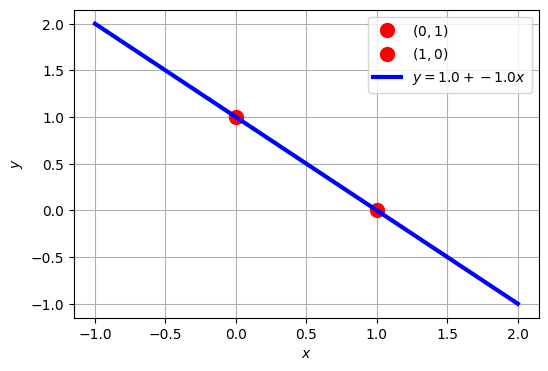

In [65]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(P1[0],P1[1],'ro',ms=10,label = f'${P1}$')
plt.plot(P2[0],P2[1],'ro',ms=10,label = f'${P2}$')
x_num = np.linspace(-1,2)
y_num = beta[0] + beta[1]*x_num

plt.plot(x_num, y_num, 'b', lw=3, label=f'$y ={np.round(beta[0],2)} + {np.round(beta[1],2)}x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()
plt.show()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [66]:
# Encontrar beta_0, beta_1 y beta_2
A = np.array([[1,-1,1],
              [1,0,0],
              [1,1,1]])
b = np.array([1,0,1])

# solucion utilizando la inversa de la mat A
beta = np.linalg.inv(A).dot(b)
beta

array([0., 0., 1.])

In [67]:
help(np.linalg.solve)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.

    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.

    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.

    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is (..., M) if b is
        shape (M,) and (..., M, K) if b is (..., M, K), where the "..." part is
        broadcasted between a and b.

    Raises
    ------
    LinAlgError
        If `a` is singular or not square.

    See Also
    --------
    scipy.linalg.solve : Similar function in SciPy.

    Notes
    -----
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.

    The solutions are computed us

In [68]:
#Método de solucion de ecuaciones (como entrada se necesitan matrices y vectores)
beta = np.linalg.solve(A,b)
beta

array([0., 0., 1.])

In [69]:
#Definiendo los puntos
P1 = (-1,1)
P2 = (0,0)
P3 = (1,1)

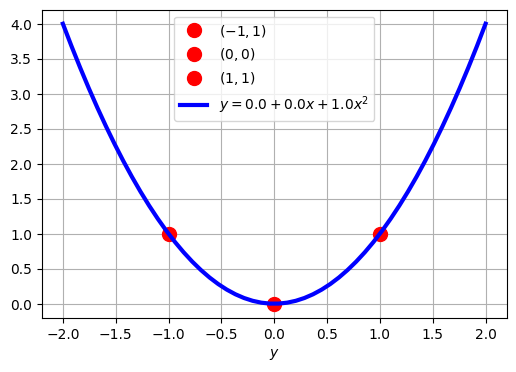

In [70]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(P1[0],P1[1],'ro',ms=10,label = f'${P1}$')
plt.plot(P2[0],P2[1],'ro',ms=10,label = f'${P2}$')
plt.plot(P3[0],P3[1],'ro',ms=10,label = f'${P3}$')
x_num = np.linspace(-2,2)
# y = b2x^2 + b1x + b0
y_num = beta[0] + beta[1]*x_num + beta[2]*x_num**2


plt.plot(x_num, y_num, 'b', lw=3, label=f'$y ={np.round(beta[0],2)} + {np.round(beta[1],2)}x + {np.round(beta[2],2)}x^2$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()
plt.show()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [71]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N =100
x = np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0,scale=2,size=(N,))

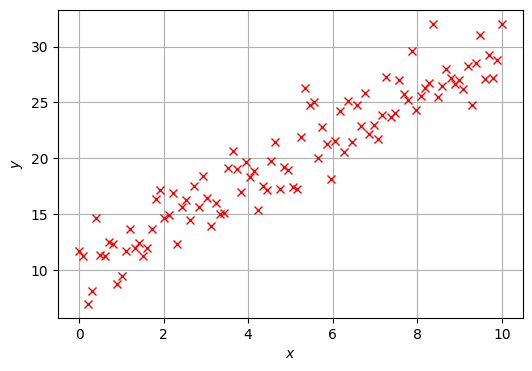

In [72]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [73]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [74]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None
)
    Minimization of scalar function of one or more variables.

    Parameters
    ----------
    fun : callable
        The objective function to be minimized::

            fun(x, *args) -> float

        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.

        Suppose the callable has signature ``f0(x, *my_args, **my_kwargs)``, where
        ``my_args`` and ``my_kwargs`` are required positional and keyword arguments.
        Rather than passing ``f0`` as the callable, wrap it to accept
        only ``x``; e.g., pass ``fun=lambda x: f0(x, *my_args, **my_kwargs)`` as the
        callable, where ``my_args`` (tuple) and ``my_kwargs`` (dic

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [75]:
# Definir funcion objetivo y punto inicial
# Beta = [beta0, beta1]
# f_hat = beta0 + beta1*x_points
def min_sqe(beta, x_points, y_points):
    n = len(x_points)
    # Modelo matematico lineal 
    f_hat = beta[0] + beta[1]*x_points
    # Error cuadrático medio (función objetivo, función de costo)
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    return sqe

In [76]:
beta_ini = [0,0] # 

In [77]:
solucion = opt.minimize(fun= min_sqe, x0 = beta_ini, args=(x,y))
solucion

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.985677630867878
        x: [ 1.024e+01  1.961e+00]
      nit: 9
      jac: [-5.960e-08 -2.682e-07]
 hess_inv: [[ 3.940e+00 -5.875e-01]
            [-5.875e-01  1.170e-01]]
     nfev: 30
     njev: 10

In [78]:
solucion.x

array([10.24107631,  1.96053627])

In [79]:
beta = solucion.x
beta

array([10.24107631,  1.96053627])

$$ \hat{y} = \beta_0 + \beta_1 x$$

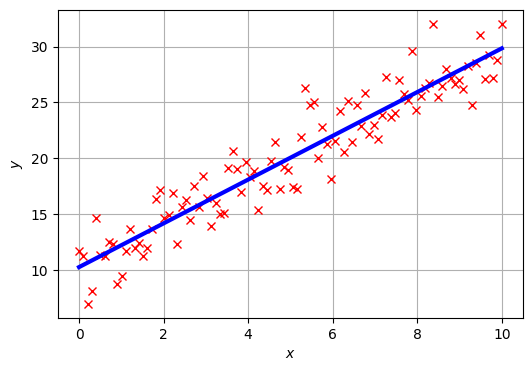

In [80]:
# Grafica de los puntos y la recta ajustada
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
f_hat_num = beta[0] + beta[1]*x
plt.plot(x, f_hat_num, 'b', lw=3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

## regresión lineal

In [81]:
import pandas as pd
data = pd.read_csv("../Modulo3/Data/ex1data1.txt", names=["population", "profit"])

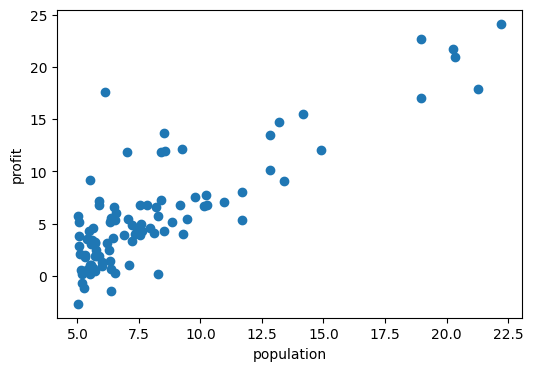

In [82]:
plt.figure(figsize=(6,4))
plt.scatter(data['population'], data['profit'])
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [83]:
# modelo matemático de la regresión lind
X_df = data[['population']]
X_df

,population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [84]:
y_df = data[['profit']]
y_df

,profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


El objetivo es estimar el modelo:

$$ \hat{y} = \beta_1 x + \beta_0$$

donde $\beta_1$ es la pendiente y $\beta_0$ es la distancia de la intersección con el eje y.

Podemos estima mediante una ecuación matricial:

$$\hat{y}=X\beta$$

$$X=[x;1]$$
$$\beta=[\beta_1 \beta_0]$$


## Redordando la Función de costo 

La funcion de costo es el error cuadrático medio, qué deberemos minimizar.

$$ J(\beta) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}(x_i) - y_i)^2$$

$\beta = [\beta_0, \beta_1]$

si derivamos parcialmente e igualamos a cero $\frac{\partial J(\beta)}{\partial \beta}=0$

### Ejercicio: encontrar mediante las derivadas parciales las ecuciones siguientes:


tendríamos que las ecuaciones del **algoritmo de gradiente descendente** son:

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



In [85]:
#Graficar un función de costo cualquiera
x_quad = [n/10 for n in range(0,100)]
y_quad = [(n-4)**2 + 5 for n in x_quad]

Text(0, 0.5, 'J')

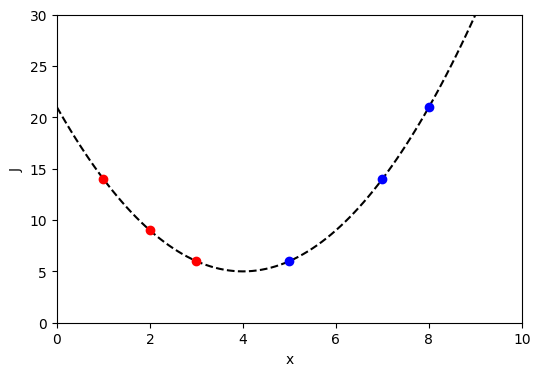

In [86]:
plt.figure(figsize=(6,4))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,30])
plt.plot([1,2,3],[14,9,6], 'ro')
plt.plot([5,7,8],[6,14,21], 'bo')
plt.xlabel('x')
plt.ylabel('J')

$$X=[1;x]$$
$$\beta=[\beta_0;\beta_1]$$
$$\hat{y}=X^T\beta = \beta_1 x +\beta_0$$


In [87]:
def func_costo(X, y, beta):
    m = len(y)
    #Calcular la funcion de costo
    J = np.sum((X.dot(beta) - y)**2)/(2*m)
    return J

In [88]:
#X=[1;x]
X_df['ones'] = 1
X_df

,population,ones
0,6.1101,1
1,5.5277,1
2,8.5186,1
3,7.0032,1
4,5.8598,1
...,...,...
92,5.8707,1
93,5.3054,1
94,8.2934,1
95,13.3940,1


In [89]:
X = X_df.values
X

array([[ 6.1101,  1.    ],
       [ 5.5277,  1.    ],
       [ 8.5186,  1.    ],
       [ 7.0032,  1.    ],
       [ 5.8598,  1.    ],
       [ 8.3829,  1.    ],
       [ 7.4764,  1.    ],
       [ 8.5781,  1.    ],
       [ 6.4862,  1.    ],
       [ 5.0546,  1.    ],
       [ 5.7107,  1.    ],
       [14.164 ,  1.    ],
       [ 5.734 ,  1.    ],
       [ 8.4084,  1.    ],
       [ 5.6407,  1.    ],
       [ 5.3794,  1.    ],
       [ 6.3654,  1.    ],
       [ 5.1301,  1.    ],
       [ 6.4296,  1.    ],
       [ 7.0708,  1.    ],
       [ 6.1891,  1.    ],
       [20.27  ,  1.    ],
       [ 5.4901,  1.    ],
       [ 6.3261,  1.    ],
       [ 5.5649,  1.    ],
       [18.945 ,  1.    ],
       [12.828 ,  1.    ],
       [10.957 ,  1.    ],
       [13.176 ,  1.    ],
       [22.203 ,  1.    ],
       [ 5.2524,  1.    ],
       [ 6.5894,  1.    ],
       [ 9.2482,  1.    ],
       [ 5.8918,  1.    ],
       [ 8.2111,  1.    ],
       [ 7.9334,  1.    ],
       [ 8.0959,  1.    ],
 

In [90]:
y = y_df.values.flatten()
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [91]:
beta = np.array([0,0])
beta

array([0, 0])

In [92]:
func_costo(X, y, beta)

np.float64(32.072733877455676)

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



In [93]:
#algoritmo de gradiente descendente
def gradiente_descendente(X, y, beta, iteraciones, alpha):
    historial_costo = []
    m = len(y)

    for it in range(iteraciones):
        # calcular el modelo lieal y_hat = b0 + b1x = X*beta
        y_hat = X.dot(beta)
        # perdida de la función (loss)
        loss = (y_hat - y)
        gradiente = X.T.dot(loss)/m
        beta = beta - alpha*gradiente

        cost = func_costo(X,y, beta)
        historial_costo.append(cost)
    
    return beta, historial_costo
    

In [94]:
#inicializamos los parámetros
beta

array([0, 0])

In [95]:
beta = np.array([0,0])
beta 

array([0, 0])

In [96]:
iteraciones = 1500
alpha = 0.01 

In [97]:
Beta, hc = gradiente_descendente(X, y, beta, iteraciones, alpha)

In [98]:
Beta

array([ 1.16636235, -3.63029144])

In [99]:
hc

[np.float64(6.737190464870009),
 np.float64(5.9315935686049555),
 np.float64(5.901154707081388),
 np.float64(5.895228586444221),
 np.float64(5.8900949431173295),
 np.float64(5.885004158443647),
 np.float64(5.879932480491418),
 np.float64(5.874879094762575),
 np.float64(5.869843911806385),
 np.float64(5.8648268653129305),
 np.float64(5.859827889932181),
 np.float64(5.85484692057229),
 np.float64(5.849883892376587),
 np.float64(5.844938740722034),
 np.float64(5.840011401218361),
 np.float64(5.835101809707226),
 np.float64(5.830209902261388),
 np.float64(5.825335615183863),
 np.float64(5.820478885007099),
 np.float64(5.815639648492154),
 np.float64(5.810817842627869),
 np.float64(5.806013404630044),
 np.float64(5.801226271940628),
 np.float64(5.7964563822269),
 np.float64(5.7917036733806535),
 np.float64(5.7869680835173956),
 np.float64(5.782249550975539),
 np.float64(5.777548014315596),
 np.float64(5.772863412319381),
 np.float64(5.768195683989212),
 np.float64(5.76354476854712),
 np.flo

El objetivo es estimar el modelo:

$$ \hat{y} = -3.63029144 x + 1.16636235$$

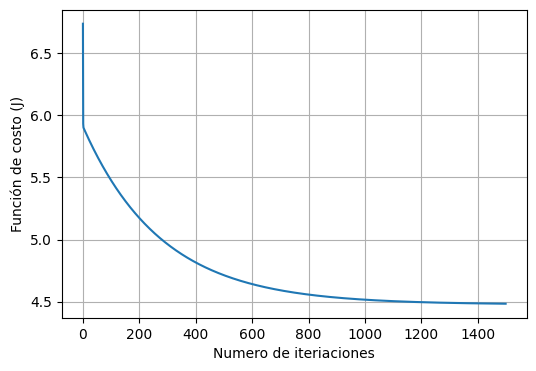

In [100]:
plt.figure(figsize=(6,4))
plt.plot(hc)
plt.xlabel('Numero de iteriaciones')
plt.ylabel('Función de costo (J)')
plt.grid()

In [101]:
x_num = np.linspace(0,25,20)
y_hat = Beta[1] + Beta[0]*x_num
y_hat

array([-3.63029144, -2.09560414, -0.56091683,  0.97377047,  2.50845777,
        4.04314508,  5.57783238,  7.11251968,  8.64720699, 10.18189429,
       11.71658159, 13.25126889, 14.7859562 , 16.3206435 , 17.8553308 ,
       19.39001811, 20.92470541, 22.45939271, 23.99408002, 25.52876732])

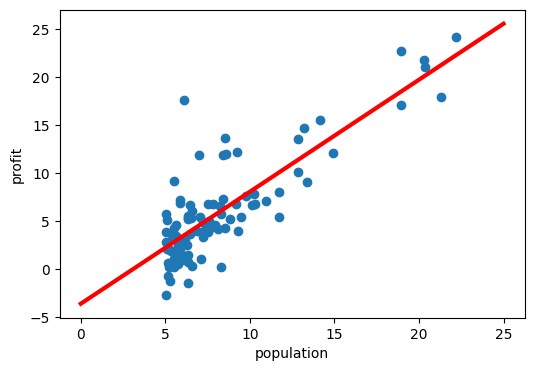

In [102]:
# Graficar la recta resultamte que más se ajusta a lso datos
plt.figure(figsize=(6,4))
plt.scatter(data['population'], data['profit'])
plt.plot(x_num, y_hat, 'r', lw=3)
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [103]:
#Encontrar una predicción
x_new = 27
y_hat_new = Beta[1] + Beta[0]*x_new
y_hat_new

np.float64(27.861492019656353)

In [104]:
def predict(Beta, X_new):
    Y_hat = Beta[1] + Beta[0]*X_new
    return Y_hat

In [105]:
predict(Beta, np.array([27,22,21,30]))

array([27.86149202, 22.02968027, 20.86331792, 31.36057907])

### Ejemplo Usando la librería de sklearn

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [108]:
x=data['population'].values.reshape(-1,1)
y=data['profit'].values.reshape(-1,1)

In [109]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(
 |      *,
 |      fit_intercept=True,
 |      copy_X=True,
 |      tol=1e-06,
 |      n_jobs=None,
 |      positive=False
 |  )
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  tol : float, default=1e-6
 |      The precision of the

In [110]:
# Aplicar el modelo
# y_hat = beta_1*x + beta_0
modelo = LinearRegression()
# Entrenamiento del modelo
modelo.fit(x,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
# Realizando predicciones
modelo.coef_

array([[1.19303364]])

In [112]:
modelo.intercept_

array([-3.89578088])

- **model.coef**: Coeficientes que acompañan a la variable independiente $\beta_1, ..., \beta_n$

- **model.intercept_**: Coeficiente de intercepción al eje de las abcisas $\beta_0$

In [113]:
modelo.coef_[0]

array([1.19303364])

In [114]:
Beta = np.array([modelo.coef_[0][0],modelo.intercept_[0] ])
Beta

array([ 1.19303364, -3.89578088])

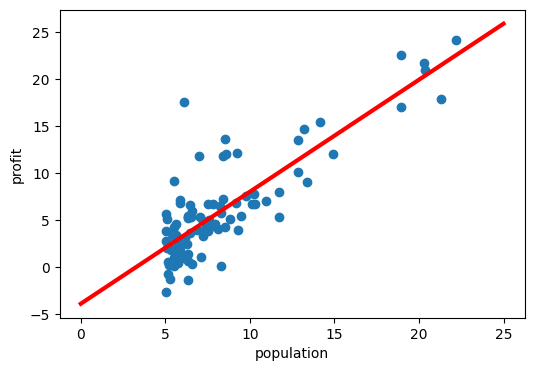

In [115]:
# Graficar la recta resultamte que más se ajusta a lso datos
# Graficar la recta resultamte que más se ajusta a lso datos
plt.figure(figsize=(6,4))
plt.scatter(data['population'], data['profit'])
plt.plot(x_num, modelo.intercept_[0] + modelo.coef_[0][0]*x_num, 'r', lw=3)
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

### Modelo obtenido:



$$ \hat{y} = ? x + ?$$

#### Predecir un nuevo elemento

In [116]:
modelo.predict(np.array([[15],[26],[32]]))

array([[13.99972378],
       [27.12309387],
       [34.28129574]])

### Otro ejemplo:

In [119]:
datos = pd.read_csv('../Modulo3/Data/Position_Salaries.csv')
datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [121]:
x = datos['Level'].values.reshape(-1,1)
y = datos['Salary'].values.reshape(-1,1)

Text(0, 0.5, 'Salary')

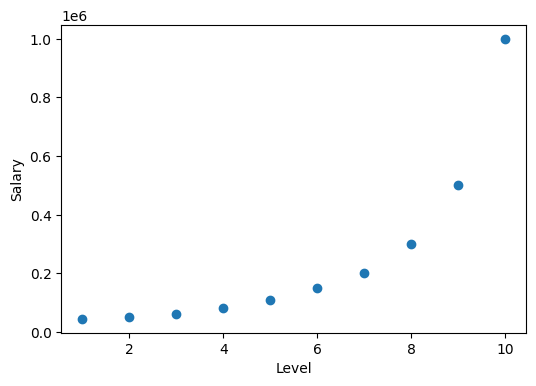

In [122]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.xlabel('Level')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

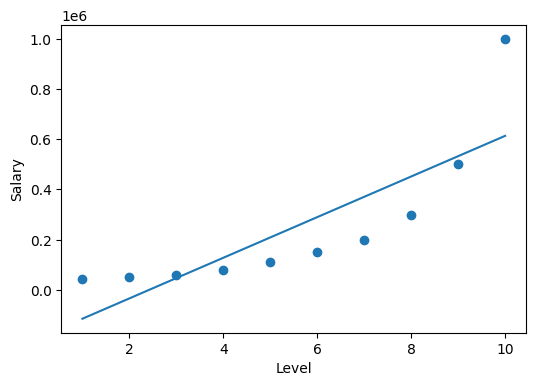

In [123]:
from sklearn.linear_model import LinearRegression
# Buscar un modelo líneal que se ajuste a los datos
#1.- entrenar un modelo con la linbrería sklearn
modelo2 = LinearRegression()
modelo2.fit(x,y)
#2.- predecir los valores de entrenamiento x
y_pred = modelo2.predict(x)
#3.- Graficar el modelo
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel('Level')
plt.ylabel('Salary')


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y, y_pred)

26695878787.878788

In [ ]:
r2_score(y, y_pred)

0.6690412331929895

### Un modelo de regresión polinomial

In [145]:
# y_hat = beta_2 x^2 + beta_1 x + beta_0 = X*Beta    , Beta = [beta0, beta1, beta2]
from sklearn.preprocessing import PolynomialFeatures

In [146]:
poly = PolynomialFeatures(degree=3, include_bias = True)

In [147]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [148]:
x_poly = poly.fit_transform(x)
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [149]:
#obtener el modelo polinomial
modelo = LinearRegression()
modelo.fit(x_poly, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [150]:
y_pred = modelo.predict(x_poly)

NameError: name 'mean_squared_error' is not defined

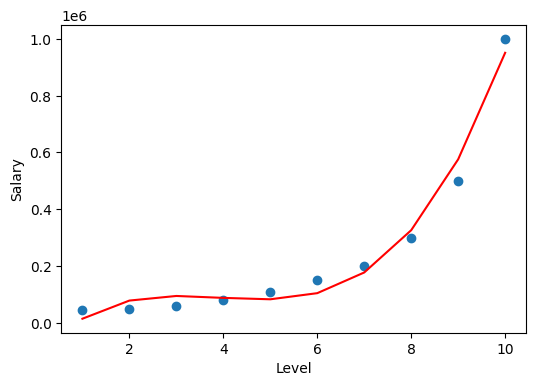

In [151]:
#3.- Graficar el modelo
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x,y_pred,'r')
plt.xlabel('Level')
plt.ylabel('Salary')
print(f'Error Cuadrático Medio: {mean_squared_error(y,y_pred)}')
print(f'R2 Score: {r2_score(y,y_pred)}')

In [152]:
modelo.coef_

array([[     0.        , 180664.33566432, -48548.95104895,
          4120.04662005]])

In [153]:
modelo.intercept_

array([-121333.3333333])

### Ejercicio : Predecir los niveles utilizando un modelo polinomial de grado 3

- Crear un modelo polinomial de grado 3
- Predecir los siguientes niveles: x_new=[11, 13, 15]
- Graficar los salarios de los valores de x_new

In [154]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [155]:
x_new = np.array([[11],[13],[15]])

In [156]:
x_new

array([[11],
       [13],
       [15]])

In [157]:
modelo.coef_

array([[     0.        , 180664.33566432, -48548.95104895,
          4120.04662005]])

In [158]:
modelo.intercept_

array([-121333.3333333])

In [159]:
# y_hat_new = b0 + b1*x + b2*x^2 + b3*x^3

In [160]:
x_poly_new = poly.fit_transform(x_new)

In [161]:
x_poly_new

array([[1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.300e+01, 1.690e+02, 2.197e+03],
       [1.000e+00, 1.500e+01, 2.250e+02, 3.375e+03]])

In [162]:
modelo.predict(x_poly_new)

array([[1475333.33333329],
       [3074272.72727261],
       [5570275.05827481]])

In [ ]:
y_predic_new = modelo.predict(x_poly_new)
y_predic_new.flatten()

array([  91272.29020979, 3074272.72727266, 5570275.05827491])

In [127]:
x_new.flatten()[0], y_predic_new.flatten()[0]

AttributeError: 'int' object has no attribute 'flatten'

AttributeError: 'int' object has no attribute 'flatten'

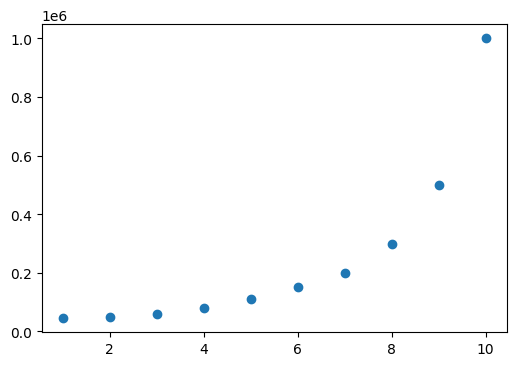

In [126]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.scatter(x_new.flatten(), y_predic_new.flatten())
plt.plot(x,y_pred,'r')
plt.xlabel('Level')
plt.ylabel('Salary')


In [ ]:
x_new.flatten()[0]

11